# **Business Case: Yulu - Hypothesis Testing**

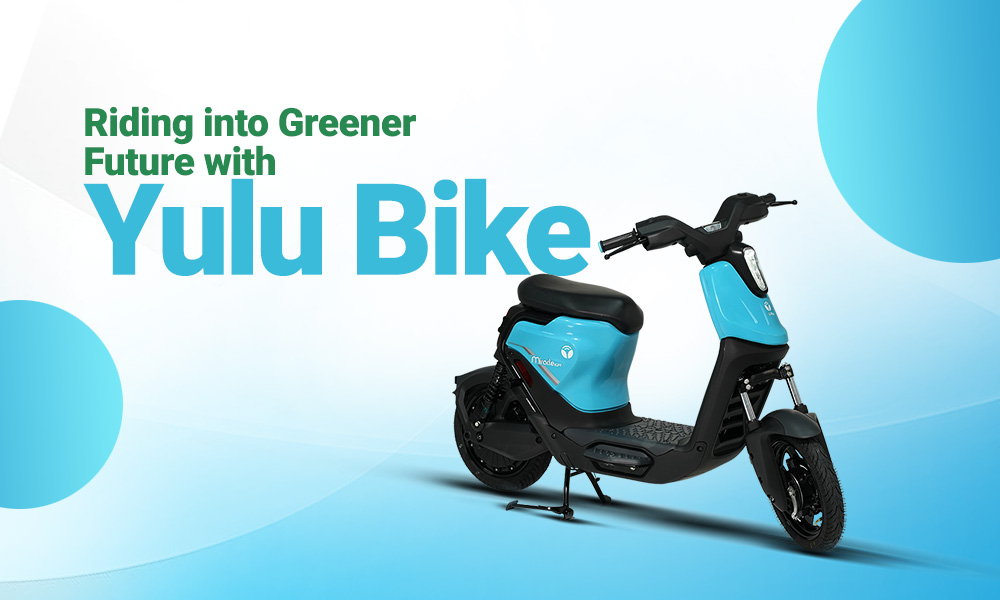

# **About Yulu**
  **Yulu** is India’s leading **micro-mobility service provider**, which offers **unique vehicles for the daily commute**. Starting off as a **mission to eliminate traffic congestion in India**, Yulu provides the **safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting**.

**Yulu zones** are located at all the appropriate locations (including **metro stations, bus stands, office spaces, residential areas, corporate offices, etc**) to make those **first and last miles smooth, affordable, and convenient!**

**Yulu** has recently **suffered considerable dips in its revenues**. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to **understand the factors affecting the demand for these shared electric cycles in the Indian market.**


# **Problem Statement**

The company wants to know:

- **Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**

- **How well those variables describe the electric cycle demands**


# **Column Profiling:**

- **datetime:** datetime
- **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
- **holiday:** whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
- **weather:**
 *    1: Clear, Few clouds, partly cloudy, partly cloudy
 *   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 *   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 *   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp:** temperature in Celsius
- **atemp:** feeling temperature in Celsius
- **humidity:** humidity
- **windspeed:** wind speed
- **casual:** count of casual users
- **registered:** count of registered users
- **count:** count of total rental bikes including both casual and registered


# **Concept Used:**

- Bi-Variate Analysis
- 2-sample t-test: testing for difference across populations
- ANNOVA
- Chi-square

# **Defining Problem Statement and Analysing basic metrics**

# **Importing Libraries**

In [542]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, shapiro, levene
from scipy.stats import f_oneway, kruskal, chi2_contingency
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [543]:
#Reading the Data

df = pd.read_csv("yulu_data.csv")

In [544]:
# printing the First 5 rows of the dataset

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [545]:
# printing the Last 5 rows of the dataset

df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [546]:
# Dataset Info
# info function let us know the columns with their data types and no. of non-null values & the total memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [547]:
# Shape of the dataset

df.shape

(10886, 12)

Here we see the Overall dataset contains **10886 Rows and 12 Columns.**

In [548]:
# To Get Total Elements in the Dataset (i.e., the dot product of no. of rows & columns)

df.size

130632

In [549]:
# To get index

df.index

RangeIndex(start=0, stop=10886, step=1)

In [550]:
# To Get name of the columns

df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [551]:
# To Get name of the columns (alternate method)

df.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [552]:
# To get memory usage of each column

df.memory_usage()

Index           128
datetime      87088
season        87088
holiday       87088
workingday    87088
weather       87088
temp          87088
atemp         87088
humidity      87088
windspeed     87088
casual        87088
registered    87088
count         87088
dtype: int64

**MISSING VALUE DETECTION**

In [553]:
# Missing Value Detection -----> Checking the Missing Values

df.isnull().sum()
# df.isna().sum() (Another method)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**INFERENCE:**

**No missing values** found - **0**

In [554]:
# Checking the duplicates

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [555]:
# Checking the duplicates

df.duplicated().sum()

0

There is **no duplicate values** in the dataset.

**TO ANALYSE THE BASIC METRICS**

In [556]:
# To get the data type of each column

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

**STATISTICAL SUMMERY**

In [557]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Describe function returns the glimpse of the data with the statistical values from all over the data just to predict the normal ranges and average ranges to the particular elements. **Note:** It will **display only the numerical values** and **return** from the **numerical values**.

**NOTE:**

Here, season, weather, holiday, working day columns are categorical but considered as numerical.

In [558]:
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


**INFERENCE:**

- **Registered users** are **more** than the **casual users**
- There are days when there is **zero casual users or even zero registered users** have been recorded.
- **Maximum** - **Windspeed** is **56.996900** , **Humidity = 100**, **Temperature** is **41 degree celcius.**
- There are **4 different seasons** and **4 different weather** conditions.

**CONVERSION TO CATEGORICAL ATTRIBUTE**

**Datatype** of following attributes needs to changed to proper data type

- datetime - to datetime
- season - to categorical
- holiday - to categorical
- workingday - to categorical
- weather - to categorical

In [559]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [560]:
cat_cols = ['season','holiday','workingday','weather']
for col in cat_cols:
  df[col] = df[col].astype('category')


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


**NOTE:**

The **Dtype** of **datetime is now changed to datetime** and **season, weather, holiday, workingday** are now changed to **category**.

In [562]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


**INFERENCE:**

- Among the **4 seasons**, **season 4 (winter)** has **more frequency** than others but still their frequencies differs by very little margin.
- Among the **4 weeather**, **weather 1** has **more frequency** than others.

In [563]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [564]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [565]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [566]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

**Splitting Datetime column into 2 Seperate Columns**

In [567]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [568]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
5047,2011-12-04 09:00:00,4,0,0,1,12.3,16.665,81,0.0,12,114,126,2011-12-04,09:00:00


In [569]:
df.drop(['datetime'],axis = 1, inplace=True)


In [570]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'time'],
      dtype='object')

In [571]:
# Accessing the rows with their iloc(integer location) values

df.iloc[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [572]:
# Accessing selected range of rows using external location values

df.loc[2:6]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,05:00:00
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01,06:00:00


In [573]:
# Accessing the specified columns for all rows using external location

df.loc[:,['season','count','date']]

,season,count,date
0,1,16,2011-01-01
1,1,40,2011-01-01
2,1,32,2011-01-01
3,1,13,2011-01-01
4,1,1,2011-01-01
...,...,...,...
10881,4,336,2012-12-19
10882,4,241,2012-12-19
10883,4,168,2012-12-19
10884,4,129,2012-12-19


# **VISUAL ANALYSIS:**

**UNIVARIATE**

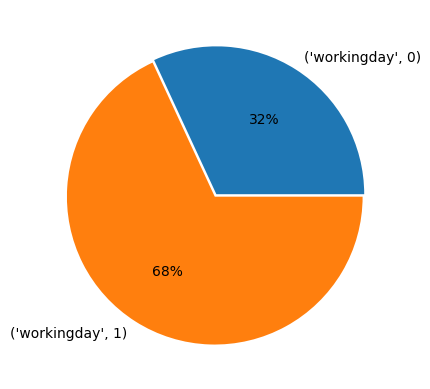

In [574]:
workingday = ['workingday']

df1 = df[workingday].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels = df1.index, explode = [0,0.02], autopct ='%.0f%%')
plt.show()

In [575]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

**INFERENCE:**

- The **working day has more frequency than the holiday**.

**Understanding the Distribution of Numerical Attributes**


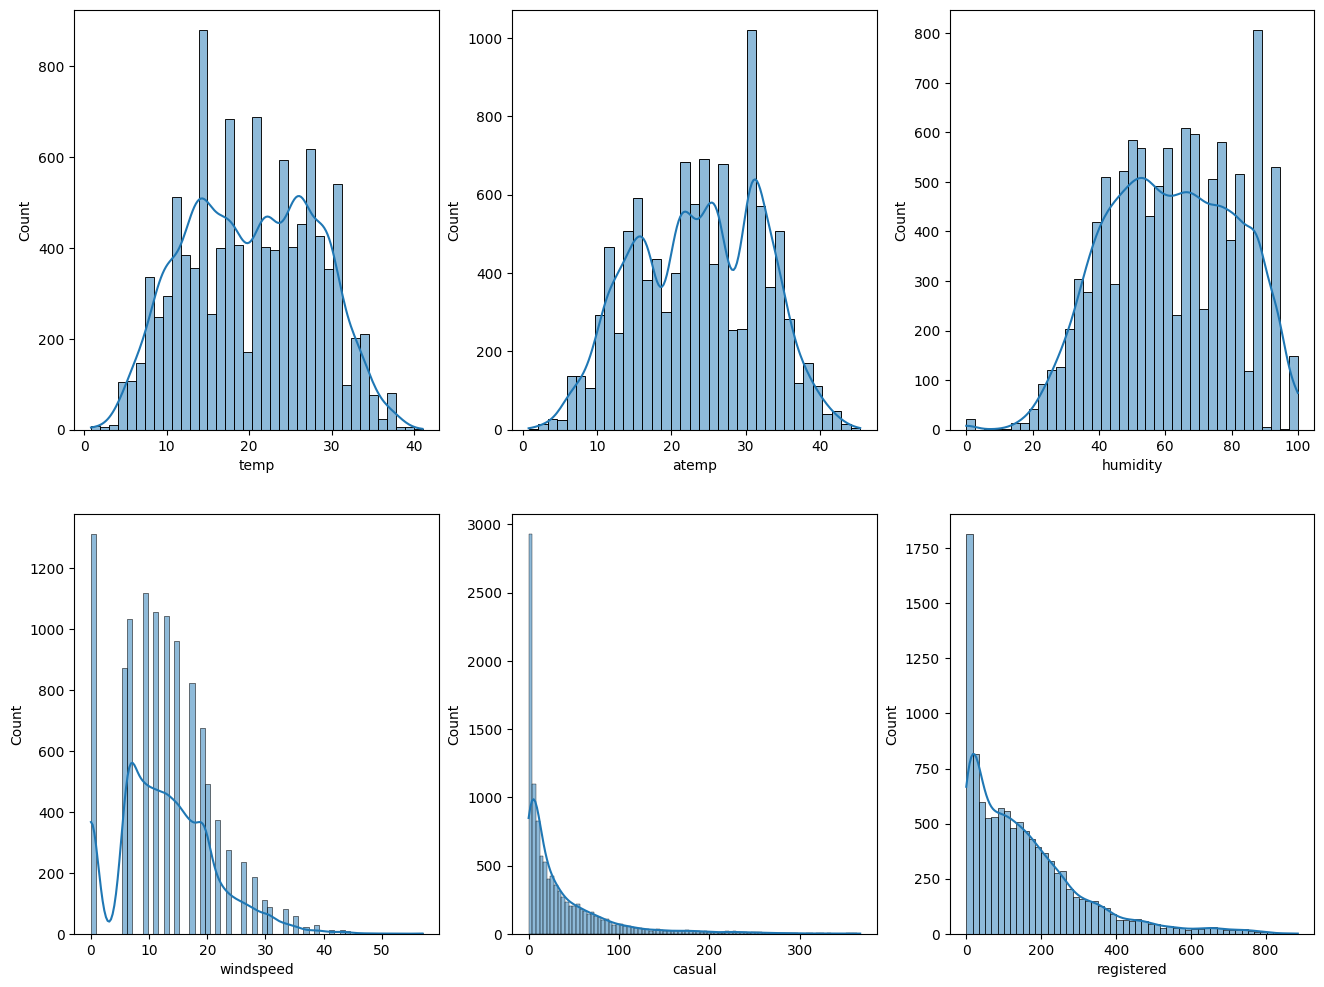

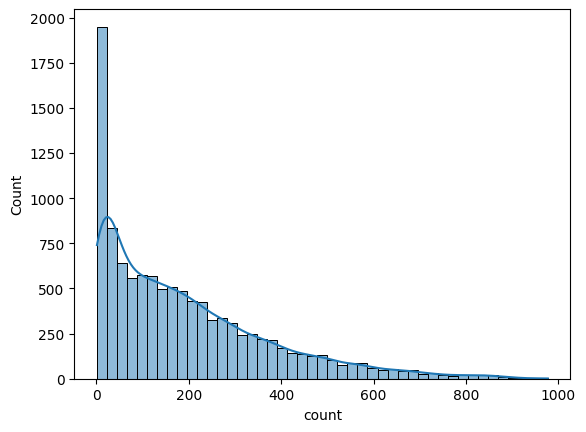

In [576]:
# taking all the numerical columns names in an array

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

# subplotting the graphs

fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))

# creating Histplot for every numerical attributes

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax = axis[row, col], kde = True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde = True)
plt.show()


**INFERENCE:**

- **Temp, atemp and humidity** looks like they **follows the Normal Distribution.**
- **Casual, Registered** and hence the **Count** somewhat looks like **Log Normal Distribution.**
- **Windspeed** follows the **Binomial Distribution.**

**Analysing Categorical Columns with Countplot**


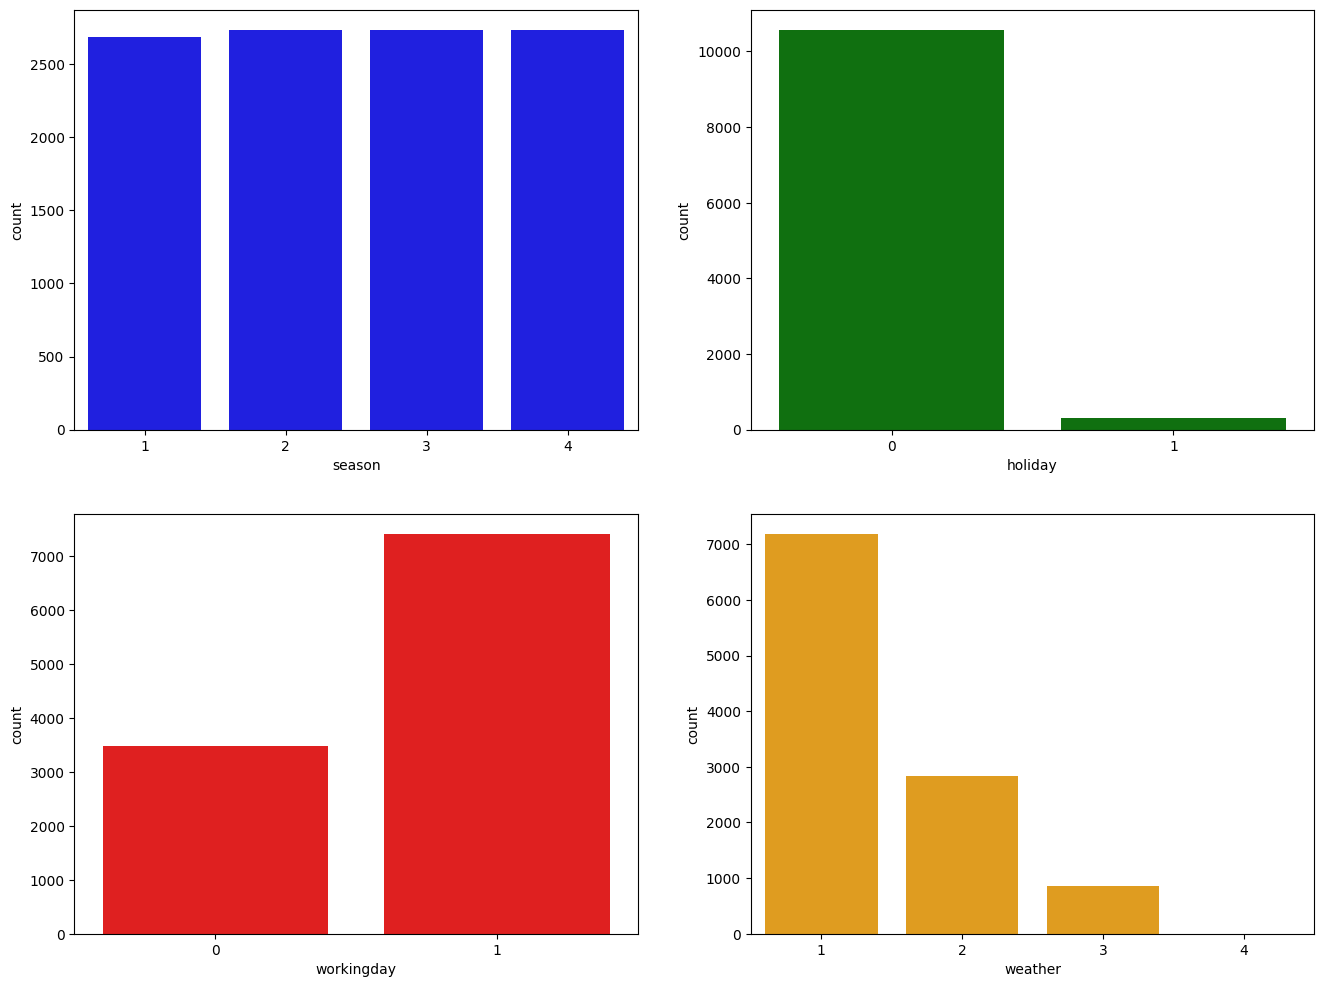

In [577]:
cat_cols = ['season','holiday','workingday','weather']

fig, axis =  plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))

index=0
colors = ['blue', 'green', 'red', 'orange']  # Specify colors for each count plot

for row in range(2):
    for col in range(2):
        sns.countplot(data = df, x = cat_cols[index], ax = axis[row,col], color = colors[index])
        index += 1

plt.show()

**INFERENCE:**

- **Data** seems **evenly distributed** across **all seasons**.
- **Working days** are **more frequent**.
- The **most common weather condition is Clear** or partly cloudy, while the least common is heavy rain, ice pallets, thunderstorms, mist, snow, and fog, which are conditions that would likely discourage bike rentals.

**Predicting Outliers Using BOXPLOT**


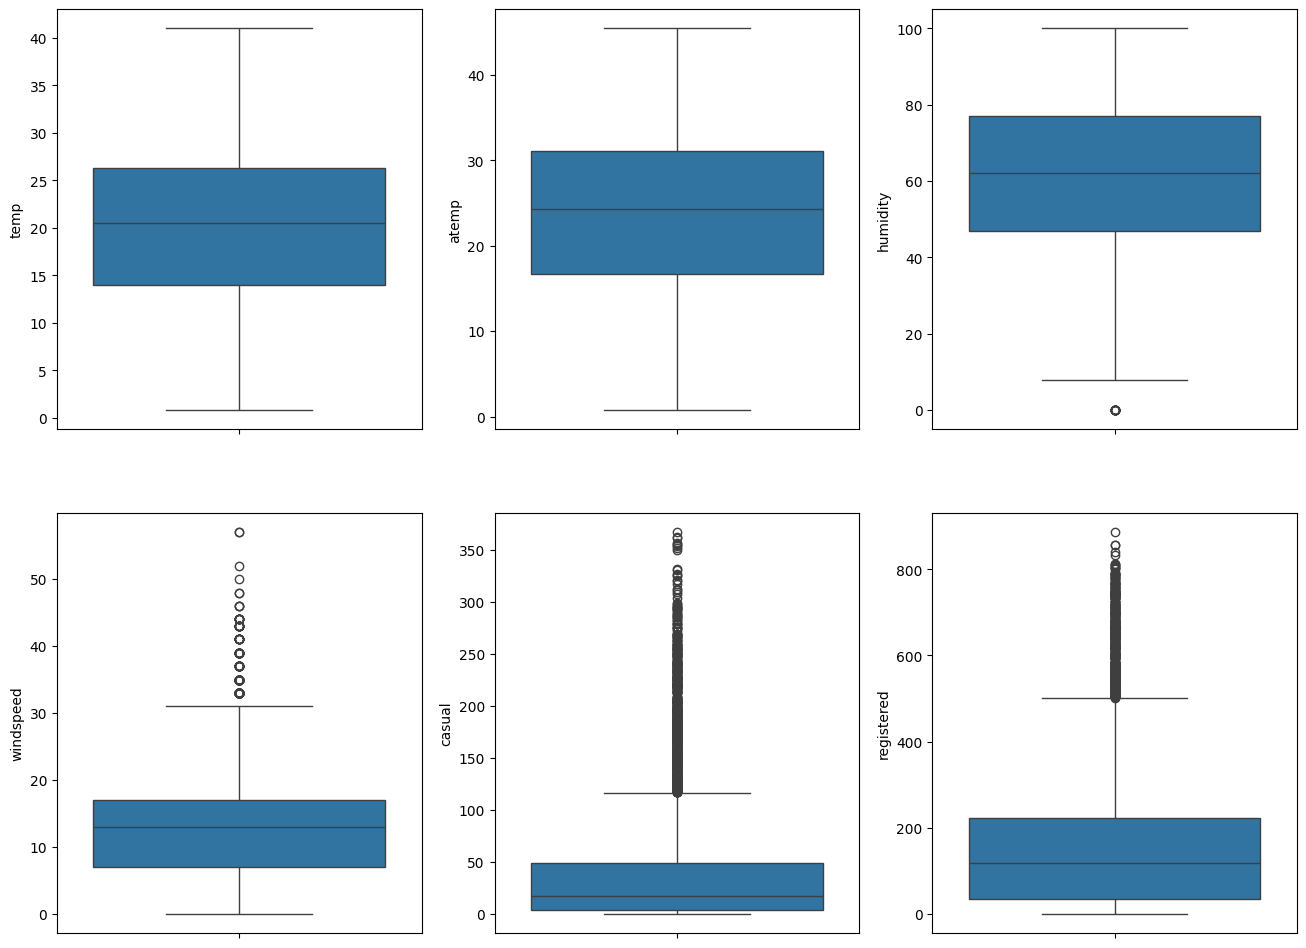

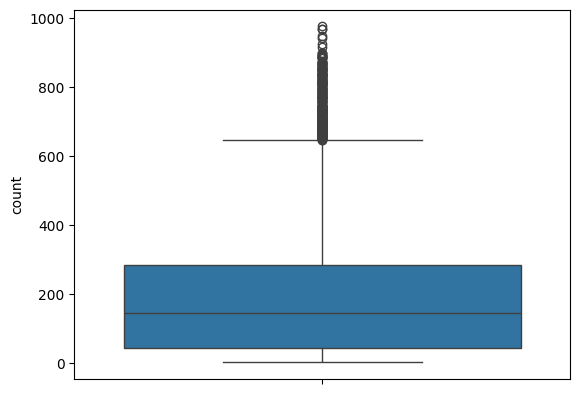

In [578]:
# plotting box plots to detect outliers in the data

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(y = df[num_cols[index]], ax = axis[row, col])
        index += 1

plt.show()
sns.boxplot(y = df[num_cols[-1]])
plt.show()

**INFERENCE:**

- We can clearly observe that **casual, registered and count have more outliers** in the dataset.
- Whereas **humidity has one outlier in the dataset** and **Windspeed has few outiers**.

**BIVARIATE ANALYSIS:**


In [579]:
df['count'].max(), df['count'].min()


(977, 1)

In [580]:
bins = [0,200,400,600,800,1000]
labels = [1,2,3,4,5]

In [581]:
df['count_bins'] = pd.cut(df['count'], bins = bins, labels = labels)


In [582]:
df['count_bins'].value_counts()

count_bins
1    6684
2    2759
3    1031
4     326
5      86
Name: count, dtype: int64

**Countplot of Categorical Columns vs Count**


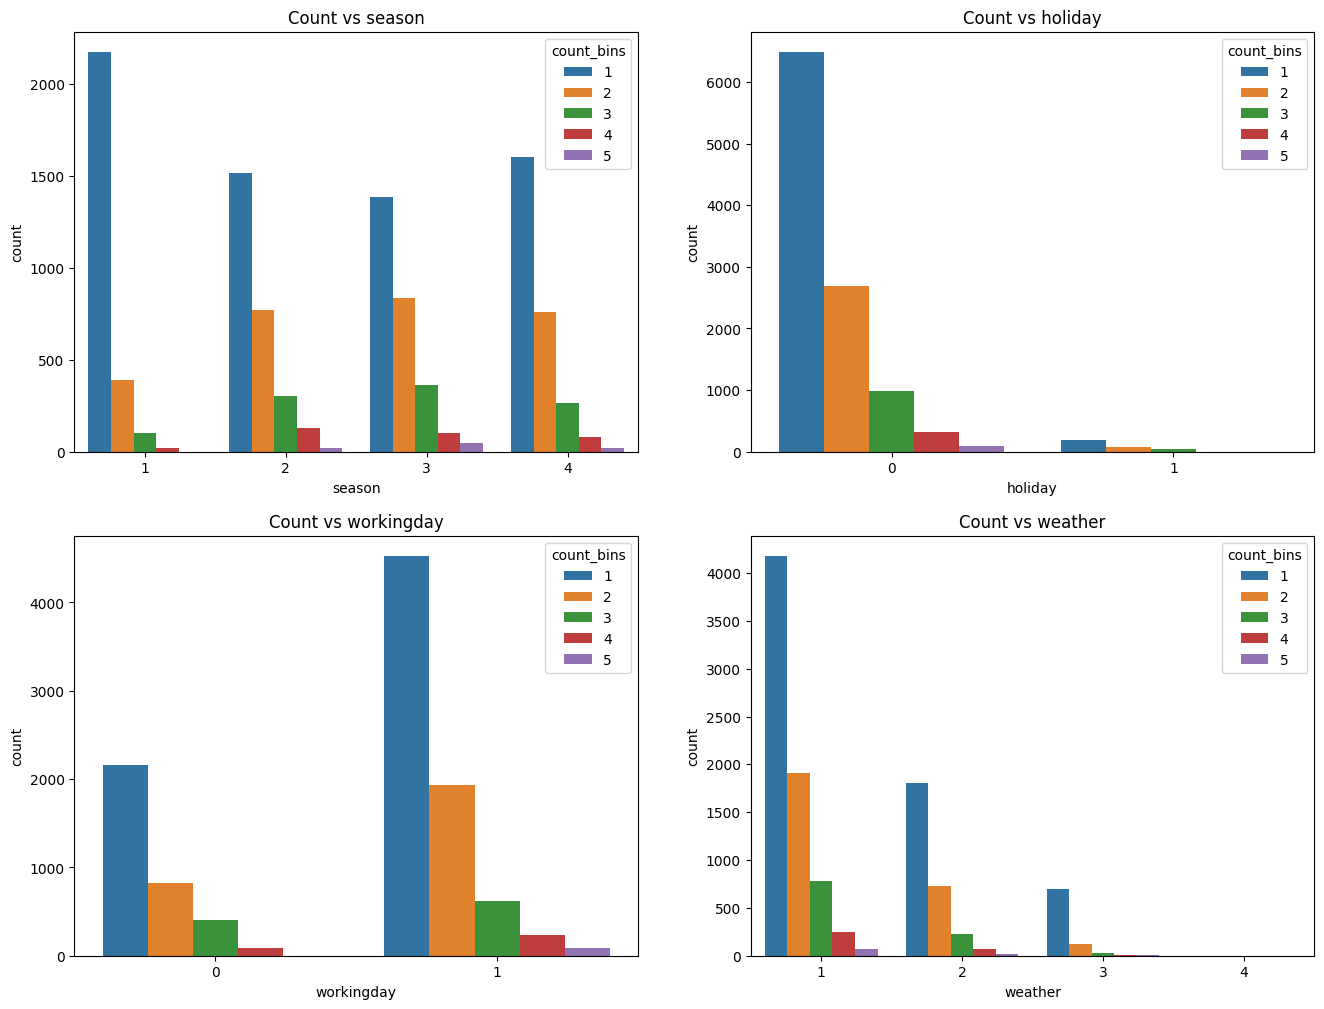

In [583]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))

index=0
for row in range(2):
  for col in range(2):
    sns.countplot(data = df, x = cat_cols[index], hue ='count_bins', ax = axis[row,col])
    axis[row,col].set_title(f'Count vs {cat_cols[index]}')
    index += 1
plt.show()

**INFERENCE:**

**Visual analysis** of a**ll the Categorical** Attributes with the count has been done.Here we observe,

- **Weather 4 has the least number of vehicles rented.**
- **Season 3 has more bikes rented.**

**PREDICTING OUTLIERS USING BOXPLOT**


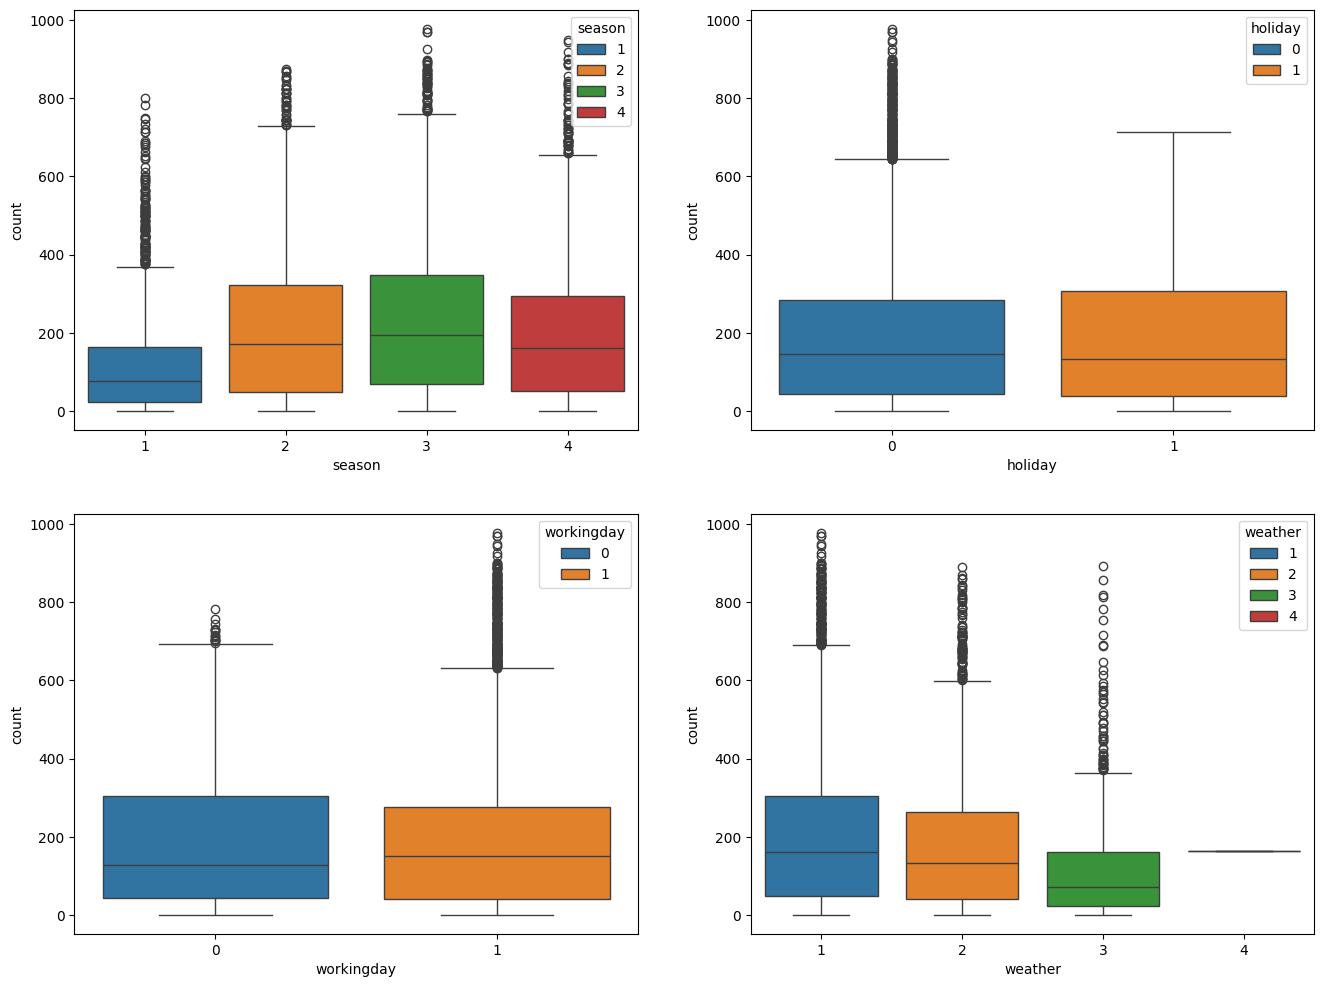

In [584]:
# plotting categorical variables againt count using boxplots

fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data = df, x = cat_cols[index], y ='count', hue = cat_cols[index], ax = axis[row, col])
        index += 1

plt.show()


**INFERENCE:**

- During the **summer and fall seasons**, the **rental** of **bikes** is **higher** compared to other seasons.
- The demand for **bike rentals increases on holidays**.
- Additionally, on **holidays or weekends**, there is a **slight increase** in bike rentals, as indicated by the working day.
- The **rental of bikes decreases** during **rainy, thunderstorm, snowy, or foggy weather conditions**.


**SCATTERPLOTS**

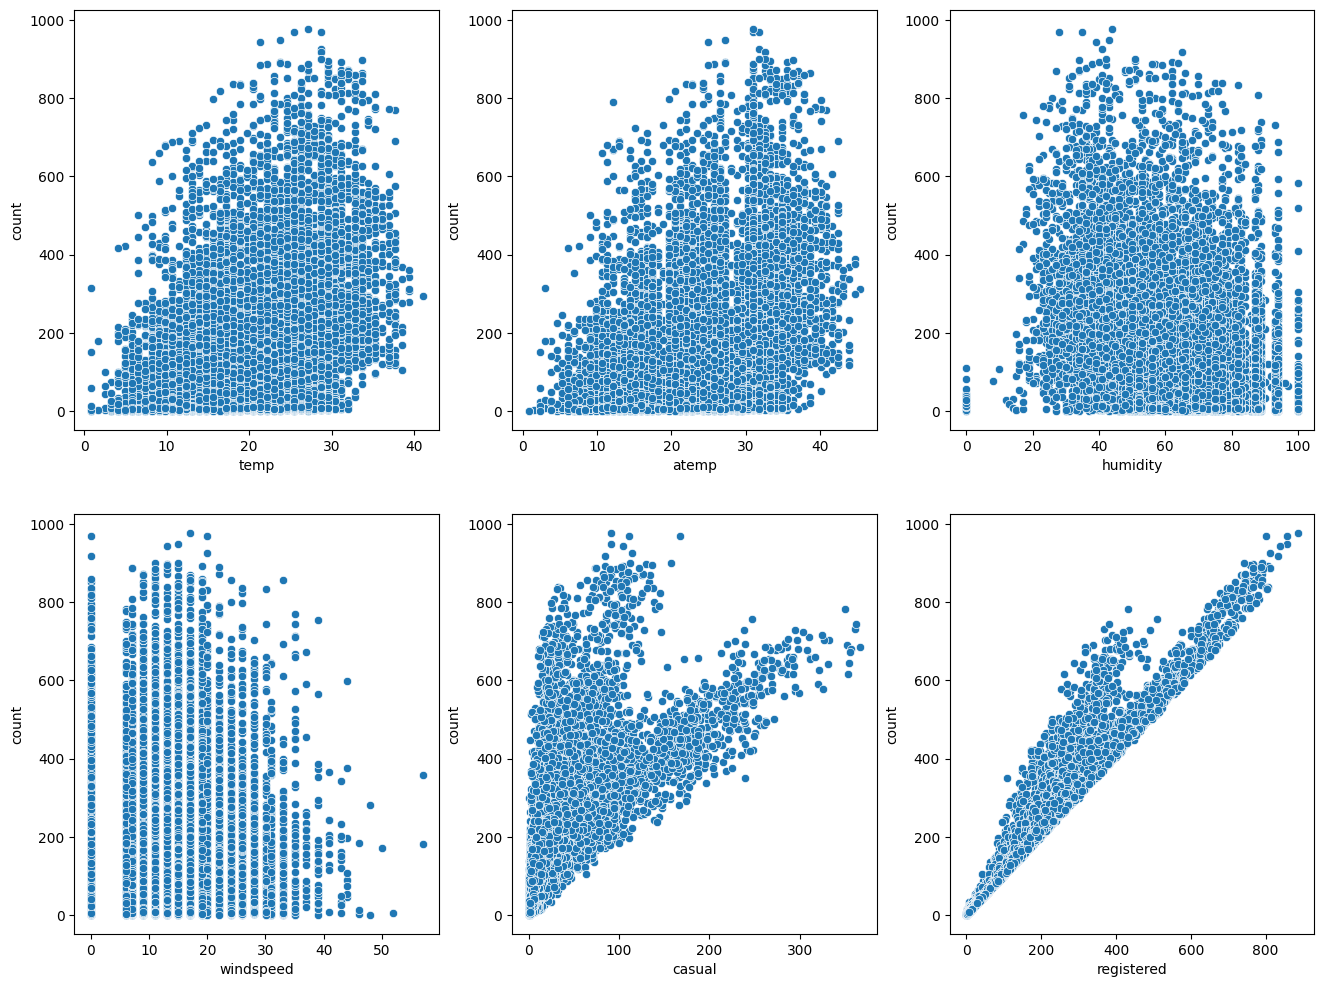

In [506]:
# plotting numerical variables againt count using scatterplot


fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data = df, x = num_cols[index], y ='count', ax = axis[row, col])
        index += 1

plt.show()


**INFERENCE:**

- **Bike rentals** significantly **decrease** when **humidity levels fall below 20**.
 **Lower temperatures below 10** degrees correlate with **reduced bike usage**.
- **Higher windspeeds exceeding 35** result in **decreased bike rentals**.
- There is a **clear linear increase** observed in both the number of **registered users and their usage** over time.

**HEATMAPS**

Correlation can be established only between two Numerical Columns.



<Axes: >

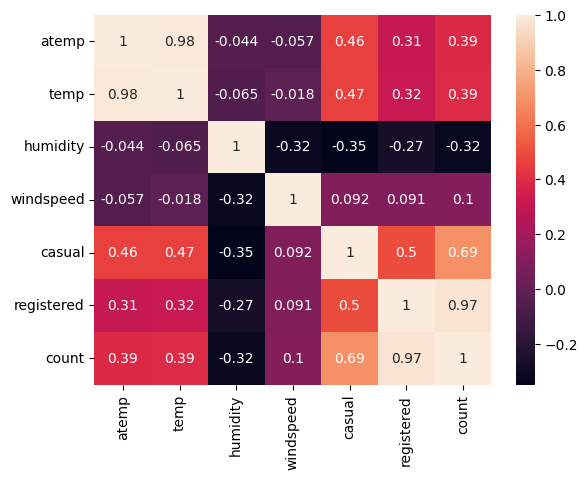

In [507]:
sns.heatmap(df[['atemp', 'temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), annot=True)


**INFERENCE:**

- **Registered users** have a **strong positive** correlation with bike count, indicating their **substantial contribution to rental numbers**.
- **Humidity** displays a **negative correlation** with count, suggesting that **rental numbers tend to decrease** in **humid conditions**.
- **Windspeed** and **Temperature** exhibit **moderate correlations** with count, indicating some **influence on rental numbers**, though **not as strong as registered** users.

# **HYPOTHESIS TESTING:**

# **1. Does working day has effect on number of electric cycles rented?**

Since the test involve a **Categorical** Column and its **Numerical** values **ttest** can be performed. Also, the **two groups are independent** of each other so we use **ttest_ind**.

**2-SAMPLE T-TEST**

**NULL HYPOTHESIS: (Ho)** - **Working day** has **no effect** on **number of electric cycles rented.**

**ALTERNATE HYPOTHESIS: (Ha)** - **Working day** has an **effect** on **number of electric cycles rented.**



In [508]:
df['workingday'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [509]:
# 2-SAMPLE INDEPENDENT T-TEST

# Ho : Working day has no effect on number of electric cycles rented.
# Ha : Working day has an effect on number of electric cycles rented.

workingday_1 = df[df['workingday']==1][['count']]
workingday_0 = df[df['workingday']==0][['count']]

t_stat, p_value = ttest_ind(workingday_1['count'], workingday_0['count'])
print('p_value : ', p_value)
print('T-statistic:', t_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Working day has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Working day has no effect on number of electric cycles rented')

p_value :  0.22644804226361348
T-statistic: 1.2096277376026694
FAIL TO REJECT Ho
INFERENCE - Working day has no effect on number of electric cycles rented


**INFERENCE:**

Here **p_value is greater than alpha**. So, our **Null Hypothesis is True**. Regardless of whether it's a **working day or not**, the number of **bikes rented** not affected it remains **consistent**.







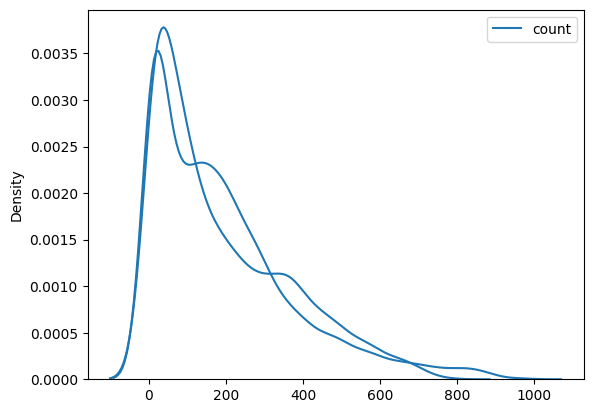

In [510]:
sns.kdeplot(workingday_1)
sns.kdeplot(workingday_0)
plt.show()

**INFERRENCE:**

The **kdeplot** vividly shows that the graphs of both the groups are **almost the same distribution** and they have **almost same mean**. so **ttest is reliable** in this case.

In [511]:
workingday_0.mean(), workingday_1.mean()

(count    188.506621
 dtype: float64,
 count    193.011873
 dtype: float64)

**INFERENCE:**

Here we can see **both the Mean** of **workingday_0 and workingday_1** has **Almost close** to Each other.

# **2. Does weather has effect on number of electric cycles rented?**

As the **test** has to be performed between **More than 2 Categorical Groups** we prefer **ANNOVA** test.



**ANNOVA**

**NULL HYPOTHESIS: (Ho)** - **Weather** has **no effect** on number of electric cycles rented.

**ALTERNATE HYPOTHESIS: (Ha)** - **Weather** has an **effect** on number of electric cycles rented.

In [512]:
df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [513]:
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']


**ASSUMPTION OF ANNOVA:**

1. Distribution follows **Gaussian.**
2. All samples are **Independent.**
3. **Equal variance** among different groups.

<Axes: xlabel='count', ylabel='Density'>

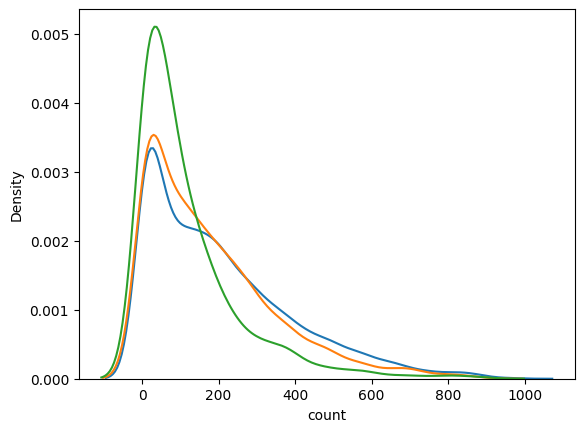

In [514]:
sns.kdeplot(weather_1)
sns.kdeplot(weather_2)
sns.kdeplot(weather_3)
sns.kdeplot(weather_4)

**SKEWNESS**

In [515]:
# SKEWNESS FOR ALL WEATHERS
print(weather_1.skew())
print(weather_2.skew())
print(weather_3.skew())
print(weather_4.skew())

1.1398572666918205
1.294444423357868
2.1871371080456594
nan


**KURTOSIS**

In [516]:
# KURTOSIS FOR ALL WEATHERS
print(weather_1.kurt())
print(weather_2.kurt())
print(weather_3.kurt())
print(weather_4.kurt())

0.964719852310354
1.5884304891319174
6.003053730759276
nan


**QQ - PLOT**

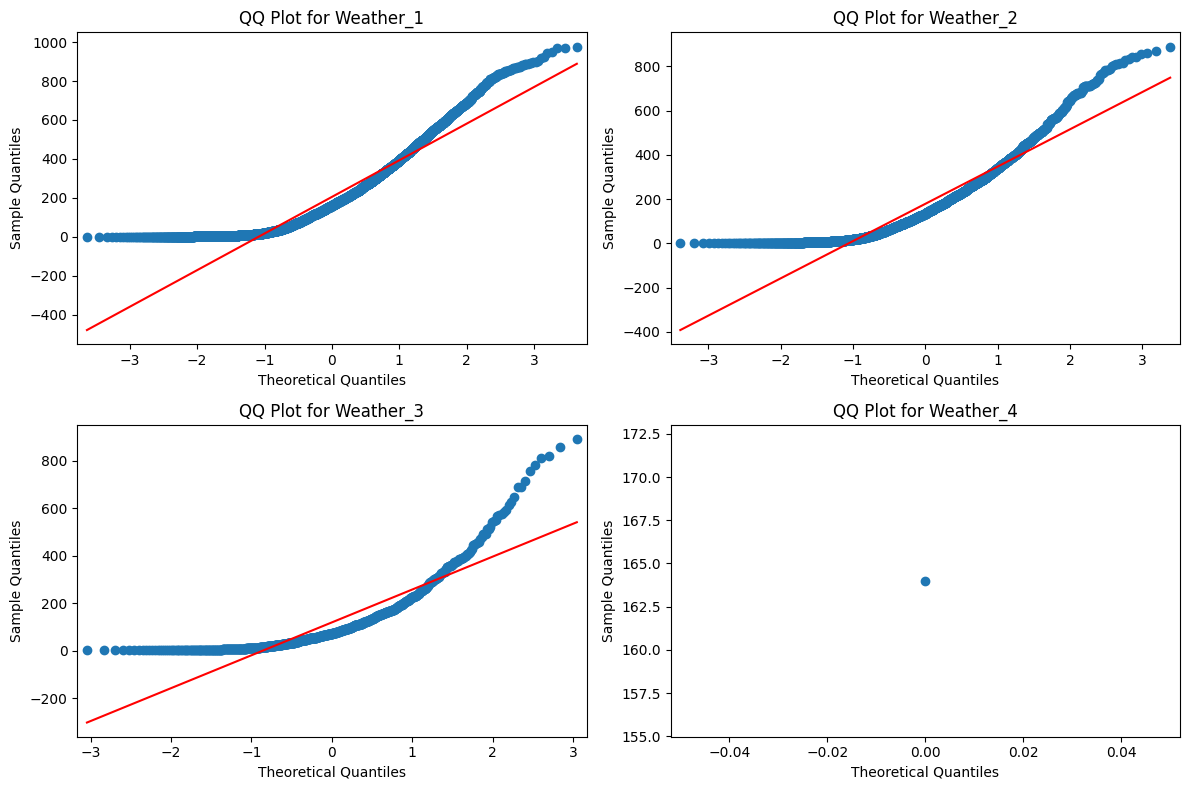

In [517]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

# Plot QQ plot for weather_1
sm.qqplot(weather_1, line ='s', ax = axes[0, 0])
axes[0, 0].set_title('QQ Plot for Weather_1')

# Plot QQ plot for weather_2
sm.qqplot(weather_2, line ='s', ax = axes[0, 1])
axes[0, 1].set_title('QQ Plot for Weather_2')

# Plot QQ plot for weather_3
sm.qqplot(weather_3, line ='s', ax = axes[1, 0])
axes[1, 0].set_title('QQ Plot for Weather_3')

# Plot QQ plot for weather_4
sm.qqplot(weather_4, line ='s', ax = axes[1, 1])
axes[1, 1].set_title('QQ Plot for Weather_4')

plt.tight_layout()
plt.show()

**SHAPIRO-WILK'S TEST**

In [518]:
# SHAPIRO-WILK'S TEST FOR NORMALITY -

# H0 : Data is Gaussian
# Ha : Data is Not Gaussian

test_stat, p_value = shapiro(df[df['weather']==1]['count'])
print('p_value : ', p_value)
print('T-statistic:', test_stat)
alpha = 0.05

if p_value < alpha:
  print("Reject HO, Data is Not Gaussian")
else:
  print("Fail to reject HO, Data is Gaussian")

p_value :  0.0
T-statistic: 0.8909230828285217
Reject HO, Data is Not Gaussian


**INFERENCE:**

- From **QQ Plots**, **Shapiro-Wilk's Test** it is clear that the **Data is Not Normal**.

- Let us check for **Equal Variance** in Each Group- **Levene's Test**

**LEVENE'S TEST**

<Axes: xlabel='count', ylabel='Count'>

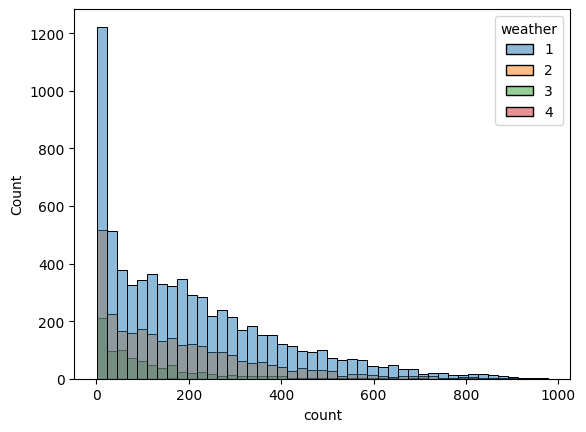

In [519]:
sns.histplot(data = df, x = df['count'], hue = 'weather')


In [520]:
# LEVENE TEST TO CHECK EQUAL VARIANCE

# H0 : All Weathers have Same Variance (high p-value)
# Ha : All Weathers have Different Variance (low p value)

test_stat, p_value = levene(weather_1, weather_2, weather_3, weather_4)
print('p_value : ', p_value)
print('T-statistic:', test_stat)
alpha = 0.05

if p_value < alpha:
  print("Reject HO, implies variance is different")
else:
  print("Fail to reject HO, All weathers have same variance")

p_value :  3.504937946833238e-35
T-statistic: 54.85106195954556
Reject HO, implies variance is different


**INFERENCE:**

- From **Levene's Test** , it is clear that the assumptions of **Equal Variance** also **don't hold True**.

- The assumptions of ANOVA are not met.

So, the **Kruskal-Wallis Test** should be **Applied** but since the question asks to implement ANOVA we will implement both the Test.

In [521]:
weather_1.var(), weather_2.var() ,weather_3.var(), weather_4.var()


(35328.79846268022, 28347.248993301797, 19204.77589271419, nan)

**INFERENCE:**

Since the **assumption of equal variance** among the groups is **violated**, **ANOVA** alone **may not be reliable**.To address this issue and ensure the validity of the analysis, we can **perform the Kruskal-Wallis test**, which is a **non-parametric alternative to ANOVA**.







**KRUSKAL-WALLIS TEST**


In [522]:
# KRUSKAL WALLIS TEST

# Ho : Weather has no effect on number of electric cycles rented.
# Ha : Weather has an effect on number of electric cycles rented.

kruskal_stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)
print('p_value : ',p_value)
print('Kruskal statistic:', kruskal_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Weather has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Weather has no effect on number of electric cycles rented')


p_value :  3.501611300708679e-44
Kruskal statistic: 205.00216514479087
REJECT Ho
INFERENCE - Weather has an effect on number of electric cycles rented


**INFERENCE:**

Here **p_value is less than alpha**. So, we **Reject Null Hypothesis**. Hence the **Kruskal-Wallis** test also **confirms** that **Weather** has **an effect** on the number of vehicles rented.

**ANNOVA TEST**

In [523]:
# ANOVA TEST

# Ho : Weather has no effect on number of electric cycles rented.
# Ha : Weather has an effect on number of electric cycles rented.

f_stat, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)
print('p_value : ', p_value)
print('F-statistic:', f_stat)

# For alpha = 0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Weather has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Weather has no effect on number of electric cycles rented')

p_value :  5.482069475935669e-42
F-statistic: 65.53024112793271
REJECT Ho
INFERENCE - Weather has an effect on number of electric cycles rented


**INFERENCE:**

Here **p_value is less than alpha**. So, we **Reject Null Hypothesis**. Hence the **Weather** has **an effect** on the number of vehicles to be rented.

<Axes: xlabel='weather', ylabel='count'>

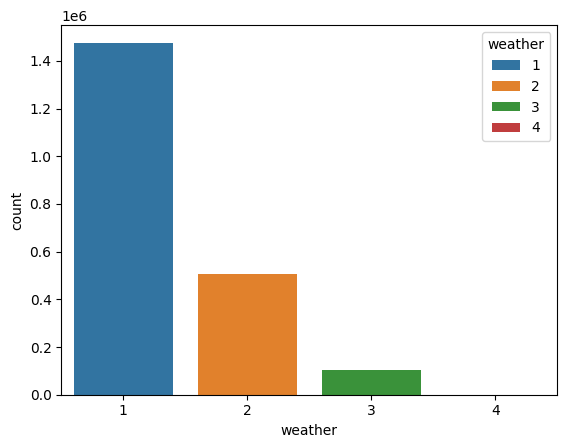

In [524]:
# Visual Analysis

weather_grouped = pd.DataFrame(df.groupby('weather')['count'].sum())

sns.barplot(data = weather_grouped, x = weather_grouped.index, hue = weather_grouped.index, y ='count')

**INFERENCE:**

A **Visual Representation confirms** that **Weather has an effect** on the number of vehicles to be rented.


# **3. Does season has effect on number of electric cycles rented?**

As the **test** has to be performed between **More than 2 Categorical Groups** we prefer **ANNOVA** test


**ANNOVA**

**NULL HYPOTHESIS: (Ho)** - **Season** has **no effect** on number of electric cycles rented.

**ALTERNATE HYPOTHESIS: (Ha)** - **Season** has an **effect** on number of electric cycles rented.

In [525]:
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [526]:
spring = df[df['season']==1]['count']
summer = df[df['season']==2]['count']
fall =   df[df['season']==3]['count']
winter = df[df['season']==4]['count']


**ASSUMPTION OF ANNOVA:**

1. Distribution follows **Gaussian.**
2. All samples are **Independent.**
3. **Equal variance** among different groups.

<Axes: xlabel='count', ylabel='Density'>

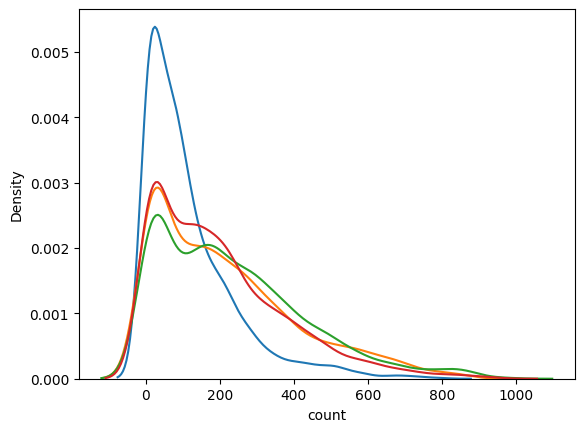

In [527]:
sns.kdeplot(spring)
sns.kdeplot(summer)
sns.kdeplot(fall)
sns.kdeplot(winter)

**SKEWNESS**

In [528]:
# SKEWNESS FOR ALL SEASONS
print(spring.skew())
print(summer.skew())
print(fall.skew())
print(winter.skew())

1.8880559001782309
1.0032642267278118
0.9914946474772749
1.172117329762622


**KURTOSIS**

In [529]:
# KURTOSIS FOR ALL SEASONS
print(spring.kurt())
print(summer.kurt())
print(fall.kurt())
print(winter.kurt())

4.31475739331681
0.42521337827415717
0.6993825795653992
1.2734853552995302


**QQ-PLOT**

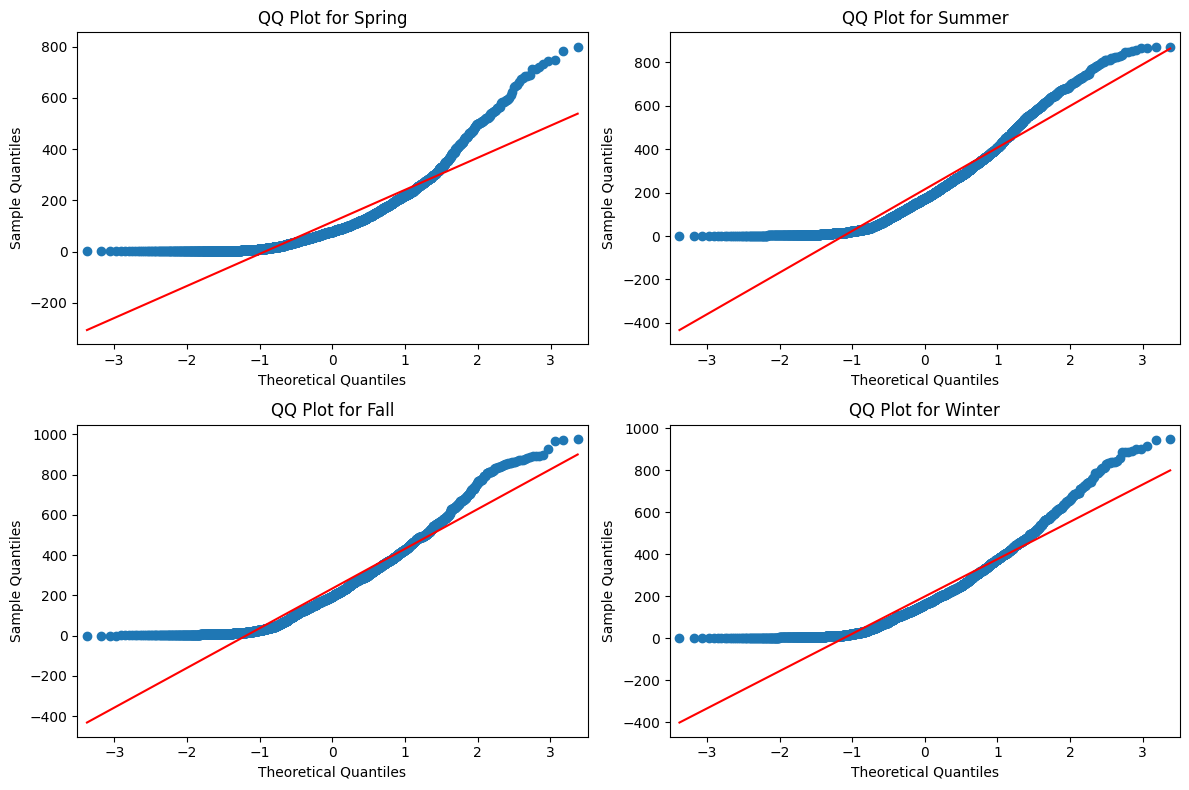

In [530]:
# QQ-PLOT FOR ALL SEANSONS

# spring, summer, fall, and winter

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

# Plot QQ plots for Spring Season
sm.qqplot(spring, line ='s', ax = axs[0, 0])
axs[0, 0].set_title('QQ Plot for Spring')

# Plot QQ plots for Summer Season
sm.qqplot(summer, line ='s', ax = axs[0, 1])
axs[0, 1].set_title('QQ Plot for Summer')

# Plot QQ plots for Fall Season
sm.qqplot(fall, line ='s', ax = axs[1, 0])
axs[1, 0].set_title('QQ Plot for Fall')

# Plot QQ plots for Winter Season
sm.qqplot(winter, line ='s', ax = axs[1, 1])
axs[1, 1].set_title('QQ Plot for Winter')

plt.tight_layout()
plt.show()


**SHAPIRO-WILK'S TEST**

In [531]:
# SHAPIRO-WILK'S TEST FOR NORMALITY -

# H0: Data is Gaussian
# Ha: Data is Not Gaussian

test_stat, p_value = shapiro(df[df['season']==2]['count'])
print('p_value : ', p_value)
print('T-statistic:', test_stat)
alpha = 0.05

if p_value < alpha:
  print("Reject HO, Data is Not Gaussian")
else:
  print("Fail to reject HO, Data is Gaussian")

p_value :  6.039093315091269e-39
T-statistic: 0.900481641292572
Reject HO, Data is Not Gaussian


**INFERENCE:**

- From **QQ Plots**, **Shapiro-Wilk's Test** it is clear that the **Data is Not Normal**.

- Let us check for **Equal Variance** in Each Group- **Levene's Test**

**LEVENE'S TEST**

<Axes: xlabel='count', ylabel='Count'>

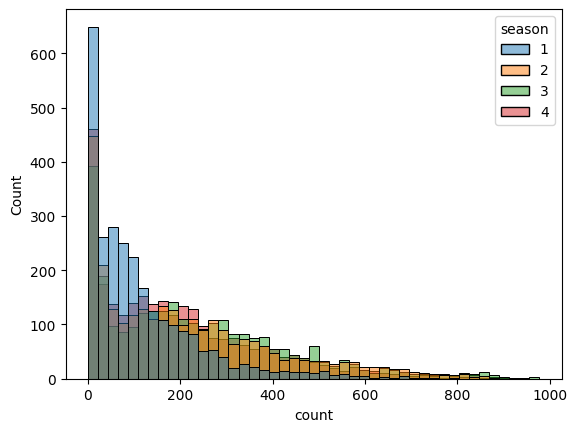

In [532]:
sns.histplot(data = df, x = df['count'], hue = 'season')

In [533]:
# LEVENE TEST TO CHECK EQUAL VARIANCE

# H0: All Seasons have Same variance (high p-value)
# Ha: All Seasons have Different variance (low p value)

test_stat, p_value = levene(spring, summer, fall, winter)
print('p_value : ', p_value)
print('T-statistic:', test_stat)
alpha = 0.05

if p_value < alpha:
  print("Reject HO, implies variance is different")
else:
  print("Fail to reject HO, All Seasons have same variance")

p_value :  1.0147116860043298e-118
T-statistic: 187.7706624026276
Reject HO, implies variance is different


**INFERENCE:**

- From **Levene's Test** , it is clear that the assumptions of **Equal Variance** also **don't hold True**.

- The assumptions of ANOVA are not met.

So, the **Kruskal-Wallis Test** should be **Applied** but since the question asks to implement ANOVA we will implement both the Test.

In [534]:
spring.var(), summer.var() ,fall.var(), winter.var()


(15693.568533717144, 36867.01182553242, 38868.517012662865, 31549.720316669307)

**INFERENCE:**

Since the **assumption of equal variance** among the groups is **violated**, **ANOVA alone may not be reliable**.To address this issue and ensure the validity of the analysis, we can **perform the Kruskal-Wallis test**, which is a **non-parametric alternative** to **ANOVA**.

**KRUSKAL-WALLIS TEST**

In [535]:
# KRUSKAL-WALLIS TEST

# Ho : Season has no effect on number of electric cycles rented.
# Ha : Season has an effect on number of electric cycles rented.

kruskal_stat, p_value = kruskal(spring, summer, fall, winter)
print('p_value : ',p_value)
print('Kruskal statistic:', kruskal_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Season has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Season has no effect on number of electric cycles rented')

p_value :  2.479008372608633e-151
Kruskal statistic: 699.6668548181988
REJECT Ho
INFERENCE - Season has an effect on number of electric cycles rented


**INFERENCE:**

Here **p_value is less than alpha**. So, we **Reject Null Hypothesis**. Hence the **Kruskal-Wallis** test also **confirms** that **Season has an effect** on the number of vehicles rented.

**ANNOVA TEST**

In [536]:
# ANNOVA TEST

# Ho : Season has no effect on number of electric cycles rented.
# Ha : Season has an effect on number of electric cycles rented.

f_stat, p_value = f_oneway(spring, summer, fall, winter)
print('p_value : ',p_value)
print('F-statistic:', f_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Season has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Season has no effect on number of electric cycles rented')


p_value :  6.164843386499654e-149
F-statistic: 236.94671081032106
REJECT Ho
INFERENCE - Season has an effect on number of electric cycles rented


**INFERENCE:**

Here **p_value is less than alpha**. So, we **Reject Null Hypothesis**. Hence the **Season** has **an effect** on the number of vehicles to be rented.

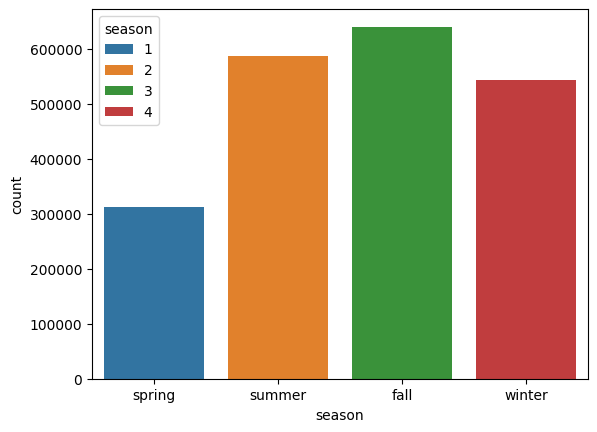

In [537]:
# Visual Analysis

season_grouped = pd.DataFrame(df.groupby('season')['count'].sum())
sns.barplot(data = season_grouped, x = season_grouped.index, y ='count', hue = season_grouped.index)
plt.xticks(range(4), ['spring', 'summer', 'fall', 'winter'])
plt.show()

**INFERENCE:**

A **Visual Representation confirms** that **Season has an effect** on the number of vehicles to be rented.

# **4. Is Weather dependent on Season ?**

**Comparing Two Categorical** columns involving their **Frequency**, so we need to **Perform Chi-square test**.



**CHI-SQUARE TEST**

**NULL HYPOTHESIS: (Ho)** - **Weather** is **Independent** on **Season**.

**ALTERNATE HYPOTHESIS: (Ha)** - **Weather** is **Dependent** on **Season**.

In [538]:
pd.crosstab(df['weather'],df['season'])


season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [539]:
# CHI-SQUARE TEST

# Ho : Weather is Independent on Season.
# Ha : Weather is Dependent on Season.

chi_stat, p_value, dof, exp = chi2_contingency(pd.crosstab(df['weather'],df['season']))
print('p_value : ',p_value)
print('Chi-square statistic:', chi_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Weather and Season are Dependent')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Weather and Season are Independent')

p_value :  1.5499250736864862e-07
Chi-square statistic: 49.15865559689363
REJECT Ho
INFERENCE - Weather and Season are Dependent


**INFERENCE:**

Here **p_value is less than alpha**. So, we **Reject Null Hypothesis**. Hence the **Weather** and **Season** which are **Dependent** to each other.

**EXTRA QUESTIONS:**

**1. Whether the number of Casual users depend on Temperature?**

**NULL HYPOTHESIS: (Ho)** - **Casual users** is **Independent** on **Temperature**.

**ALTERNATE HYPOTHESIS: (Ha)** - **Casual users** is **Dependent** on **Temperature**.

In [540]:
# CHI-SQUARE TEST

# Ho : Casual users is Independent on Temperature.
# Ha : Casual users is Dependent on Temperature.

chi_stat,p_value,dof,exp = chi2_contingency(pd.crosstab(df['temp'],df['casual']))
print('p_value : ', p_value)
print('Chi-square statistic:', chi_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Temperature and number of Casual users are Dependent')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Temperature and number of Casual users are Independent')


p_value :  1.7731490661070978e-237
Chi-square statistic: 21180.761709678387
REJECT Ho
INFERENCE - Temperature and number of Casual users are Dependent


**INFERENCE:**

Here **p_value is less than alpha**. So, we **Reject Null Hypothesis**. Hence the **Number of Casual users are dependent on Temperature**.

**2. Whether the number of Registered users depend on temperature ?**

**NULL HYPOTHESIS: (Ho)** - **Registered users** is **Independent** on **Temperature**.

**ALTERNATE HYPOTHESIS: (Ha)** - **Registered users** is **Dependent** on **Temperature**.


In [541]:
# CHI-SQUARE TEST

# Ho : Registered users is Independent on Temperature.
# Ha : Registered users is Dependent on Temperature.

chi_stat,p_value,dof,exp = chi2_contingency(pd.crosstab(df['temp'],df['registered']))
print('p_value : ', p_value)
print('Chi-square statistic:', chi_stat)

# For alpha =0.05 i.e., 95% confidence level
alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Temperature and number of Registered users are Dependent')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Temperature and number of Registered users are Independent')


p_value :  0.99943702404443
Chi-square statistic: 34184.186088939816
FAIL TO REJECT Ho
INFERENCE - Temperature and number of Registered users are Independent


**INFERENCE:**

Here **p_value is greater than alpha**. So, our **Null Hypothesis is True**. Hence the **Number of Registered Users are Independent on Temperature**.

# **BUSINESS INSIGHTS**

- During the **Summer** and **Fall Seasons**, there is a **Higher demand** for **bike rentals** compared to other Seasons.
- **Holidays** tend to **coincide with increased** bike rentals.
- Observations on **working days** indicate **slightly higher** bike rentals **on holidays or weekends**.
- Bike rentals **decrease** during **rainy, thunderstorm, snowy, or foggy weather conditions**.
- Bike rentals **drastically decrease** when **humidity levels** are **below 20**.
- **Lower temperatures**, specifically **below 10 degrees**, result in **fewer bike rentals**.
- **High windspeeds exceeding 35** contribute to **decreased** bike rentals.







# **RECOMMENDATIONS**


- During **Summer** and **Fall Seasons**, it's advisable for the company to **maintain a larger stock of bikes** for rental due to **heightened demand** compared to other seasons.
- **Adjust rental rates** to encourage bike usage during **off-peak hours**, enhancing accessibility.
- During periods of **very low humidity**, **reducing the stock** of available bikes for rental would be **prudent**, allowing for **maintenance and repair work** to be conducted.
- In **colder weather** conditions, particularly when temperatures **drop below 10 degrees**, **reducing the number of available bikes** for rental is recommended.
- Conduct thorough **Seasonal bike maintenance** to **prevent breakdowns**.
- Based on a significance level of **0.05**, there's **no significant impact** of working days on bike rental numbers.
- Similarly, during periods of **high windspeeds exceeding 35** or during thunderstorms, reducing the available stock of bikes for rental is advisable.